In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import time

In [33]:
dataframe3 = pd.read_excel('COVID-19 US state policy database 6_10_2021.xlsx')
df2 = pd.read_csv('time_series_covid_19_confirmed_US.csv')

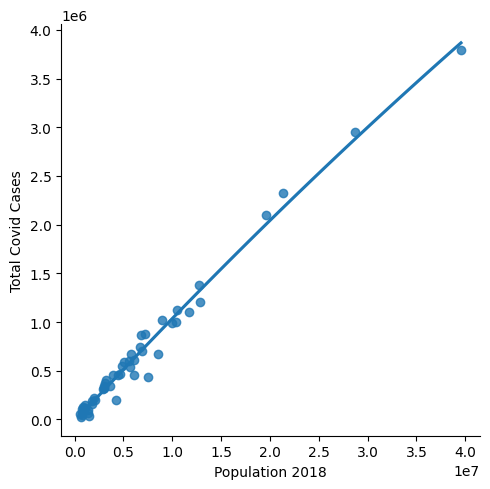

In [34]:
states = (df2['Province_State'].unique())
row = []
popValues = []
for state in states:
    r = df2.loc[df2["Province_State"] == state, "5/29/21"]
    sum_row = r.sum(axis=0)
    row.append(sum_row)
df = pd.DataFrame(row) 
df.columns = ["Total Covid Cases"]
for index, state in enumerate(states):
    df.rename(index={index: state}, inplace=True)
df = df.drop(["American Samoa", "Diamond Princess", "Grand Princess", "Northern Mariana Islands", "Guam", "Puerto Rico", "Virgin Islands" ], axis=0)
r = dataframe3.loc[:,"POP18"]
for index, val in enumerate(r):
    if index > 3:
        popValues.append(val)
df["Population 2018"] = popValues

sns.lmplot(x ="Population 2018", y ="Total Covid Cases", data = df, order = 2, ci = None)


In [35]:
def linear_regression(X_test, y_test, alpha, iterations, num_image_updates):
    w = 0
    b = 0
    step_size = iterations/num_image_updates

    for i in range(iterations):
        dJ_dw = 0
        dJ_db = 0
        for j in range(len(X_test)):
            dJ_dw = dJ_dw + (1/len(X_test))*(w*X_test[j] + b - y_test[j])*X_test[j]
            dJ_db = dJ_db + (1/len(X_test))*(w*X_test[j] + b - y_test[j])
        w = w - alpha*dJ_dw
        b = b - alpha*dJ_db

        y_pred = np.empty([len(X_test), 1])
        for k in range(len(X_test)):
            y_pred[k]  = w*X_test[k] + b

        if i % step_size == 0:
            plt.clf()
            plt.scatter(X_test, y_test, color ='b')
            plt.plot(X_test, y_pred, color ='k')
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(1)
    
    parameters = (w, b)
    return parameters

(array([0.10010293]), array([7.3024558e-09]))


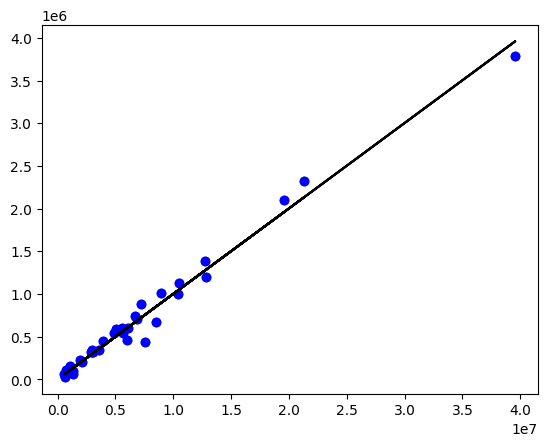

In [36]:
X = np.array(df['Population 2018']).reshape(-1, 1)
y = np.array(df['Total Covid Cases']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

alpha = 10 ** -16
iterations = 1000
num_image_updates = 20
parameters = linear_regression(X_test, y_test, alpha, iterations, num_image_updates)
print(parameters)

y_pred = np.empty([len(X_test), 1])
for i in range(len(X_test)):
    y_pred[i]  = parameters[0]*X_test[i] + parameters[1]

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [37]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    return x

def g(w, b):
    if(w != '' and b != ''):
        return int(w) + int(b)

In [38]:
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [39]:
interact(g, w = '', b = '')

interactive(children=(Text(value='', description='w'), Text(value='', description='b'), Output()), _dom_classe…

<function __main__.g(w, b)>

In [40]:
#version of linear regression with w, b text box functionality
def linear_regression(X_test, y_test, alpha, iterations, num_image_updates, has_w_b, w, b):
    
    #has_w_b = last_three_params[0]
    #w = last_three_params[1]
    #b = last_three_params[2]
    
    if has_w_b == False:
        w = 0
        b = 0
        
        step_size = iterations/num_image_updates
    
        for i in range(iterations):
            dJ_dw = 0
            dJ_db = 0
            for j in range(len(X_test)):
                dJ_dw = dJ_dw + (1/len(X_test))*(w*X_test[j] + b - y_test[j])*X_test[j]
                dJ_db = dJ_db + (1/len(X_test))*(w*X_test[j] + b - y_test[j])
            w = w - alpha*dJ_dw
            b = b - alpha*dJ_db

            y_pred = np.empty([len(X_test), 1])
            for k in range(len(X_test)):
                y_pred[k]  = w*X_test[k] + b

            if i % step_size == 0:
                plt.clf()
                plt.scatter(X_test, y_test, color ='b')
                plt.plot(X_test, y_pred, color ='k')
                display.display(plt.gcf())
                display.clear_output(wait=True)
                time.sleep(1)
    else:
        y_pred = np.empty([len(X_test), 1])
        for k in range(len(X_test)):
            y_pred[k]  = w*X_test[k] + b

        
        plt.clf()
        plt.scatter(X_test, y_test, color ='b')
        plt.plot(X_test, y_pred, color ='k')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    
    parameters = (w, b)
    return parameters

In [41]:
def run_lin_reg(has_w_b, w, b):
    parameters = (0,0)
    #replace has_w_b text with a button or checkbox
    if(w != '' and b != '' and has_w_b == "True"):
        w = float(w)
        b = float(b)

    X = np.array(df['Population 2018']).reshape(-1, 1)
    y = np.array(df['Total Covid Cases']).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

    alpha = 10 ** -16
    iterations = 1000
    num_image_updates = 20

    #has_w_b is in place of the button
    #for button, if you press the button for running linear regression with w and b, it will set it to True; if you press the button for regular linear regression, it will set it to false
    
    #can add a button pressed condition here
    if(w != '' and b != ''):
        parameters = linear_regression(X_test, y_test, alpha, iterations, num_image_updates, True, w, b)

    print(parameters)

    y_pred = np.empty([len(X_test), 1])
    for i in range(len(X_test)):
        y_pred[i]  = parameters[0]*X_test[i] + parameters[1]

    plt.scatter(X_test, y_test, color ='b')
    plt.plot(X_test, y_pred, color ='k')
    plt.show()

    return

In [42]:
interact(run_lin_reg, has_w_b = 'Enter True or False', w = '', b = '')
#it works, neaten code/ add a button fits nicely somewhere

interactive(children=(Text(value='Enter True or False', description='has_w_b'), Text(value='', description='w'…

<function __main__.run_lin_reg(has_w_b, w, b)>

Joey's work 

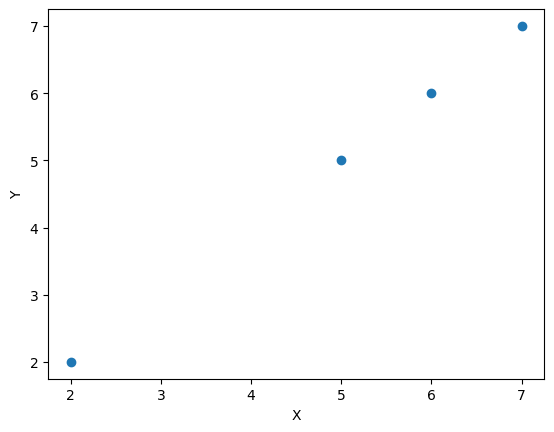

In [46]:
from ipywidgets import HBox, VBox, Text, Button
import matplotlib.pyplot as plt

text_box1 = Text(value='', placeholder='x1, x2, .....', description='X')
text_box2 = Text(value='', placeholder='y1, y2, .....', description='Y')
button = Button(description='Enter')

def on_button_click(b):
    x_input = text_box1.value
    y_input = text_box2.value
    # parse the data and create a plot 
    x_values = x_input.split(',')
    y_values = y_input.split(',')
    data = [(float(x_values[i]), float(y_values[i])) for i in range(min(len(x_values), len(y_values)))]
    plt.scatter(*zip(*data))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


button.on_click(on_button_click)

input_box = HBox([text_box1, text_box2])
output_box = VBox([input_box, button])
output_box

